# Ex 3. Separate inhibitory population

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**3.1.** Write down the total input to an excitatory and an inhibitory neuron. Show that the average input
to an excitatory neuron is equivalent to the input to a neuron in the model of exercise 2, for b = 0.

**Part 1.**
The total input to an excitatory neuron is comprised of inputs from inhibitory and excitatory neurons:
$$h_{i} = h_{exc} - h_{inh}$$
Firstly, we consider $h_{exc}$:
\begin{align}
h_{exc} = W \sigma_{exc}
 = \sum_{j}^{N} W_{ij}^{E \leftarrow E} \sigma_{j}(t)
 = \sum_{j}^{N} \frac{c}{N} \sum_{\mu}^{M} \xi_{i}^{\mu} \xi_{j}^{\mu} \sigma_{j}(t)
\end{align}
Secondly, we consider $h_{inh}$:
\begin{align}
h_{inh} = W \sigma_{inh}
 = \sum_{k}^{K} W_{ik}^{E \leftarrow I} \sigma_{k}^{I}(t)
 = \sum_{k}^{K} \frac{ca}{N_{I}} \sum_{\mu}^{M} \xi_{i}^{\mu} \sigma_{k}^{I}(t)
\end{align}
Hence, the total input to the excitatory neuron is:
\begin{align}
h_{i} = \sum_{j}^{N} W_{ij}^{E \leftarrow E} \sigma_{j}(t) - \sum_{k}^{N_{I}} W_{ik}^{E \leftarrow I} \sigma_{k}^{I}(t)
\end{align}

Analogously, the total input to the inhibitory neuron is equal to:
\begin{align}
h_{k} = \sum_{k} W_{ki}^{I \leftarrow E} \sigma_{k}(t) = \frac{1}{K} \sum_{k} \sigma_{k}(t),
\end{align}
where $k \in S$, where $S$ is the set of pre-synaptic neurons.


**Part 2.**
1. Inhibiting neurons have linear gain function and fire stochastically: $Prob(\sigma_k = +1| h_{k}^{inh}) = h_{k}^{inh}$, where k is an index of an inhibitory neuron $1 \le k \le N_{I}$.

2. Each inhibitory neuron $k$ recieves receives input from $K$ excitatory neurons. Connections are random and of equal weight $w_{ki}^{I \leftarrow E} = \frac{1}{K}$.
3. Thus, the input potential of the neuron k is $h_{k}^{inh} = \frac{1}{K} \sum_{j \in S}$, where S is the set of pre-synaptic neurons.
4. Connection from inhibitory neuron back to excitatory neuron $w_{ik}^{E \leftarrow I} = \frac{a}{N_I} \sum_{\mu} \xi_{i}^{\mu}$
5. The total input from inhibitory neuron to excitatory is, therefore, $h_{inh} = \sum_{k} w_{ik}^{E \leftarrow I} \sigma_{k} = \sum_{k} \frac{a}{N_I} \sum_{\mu} \xi_{i}^{\mu} \sigma_{k} = \frac{ca}{N_I} \sum_{k} \sum_{\mu} \xi_{i}^{\mu} \sigma_{k}$.
6. Putting everything together and considering that $k=j$ and $N=N_I$.
$$<h_{i}(t)> = \frac{c}{N} \sum_{\mu}^{M} \xi_{i}^{\mu} \sum_{j}^{N} \xi_{j}^{\mu} \sigma_{j}(t) - \frac{c}{N} \sum_{\mu}^{M} \xi_{i}^{\mu} \sum_{j}^{N} \xi_{j}^{\mu} \sigma_{j}(t) a$$
$$ = \frac{c}{N} \sum_{\mu}^{M} \sum_{j}^{N} \xi_{i}^{\mu} (\xi_{j}^{\mu} - a) \sigma_{j}(t)$$
Which is equivalent to the low-activity Hopfield model discussed in part 2:
$$<h_{i}(t)> = \sum_{j}^{N} w_{ij} \sigma_{j}(t)$$
$$ = \frac{c}{N} \sum_{j}^{N} \sum_{\mu}^{M} (\xi_{i}^{\mu}-b)(\xi_{j}^{\mu}-a) \sigma_{j}(t)$$
$$ = \frac{c}{N} \sum_{j}^{N} \sum_{\mu}^{M} \xi_{i}^{\mu}(\xi_{j}^{\mu}-a) \sigma_{j}(t), QED$$

**3.2.** Write a method for simulating this new model.
There are two ways of updating the states. Either the input hi(t) to excitatory neuron i depends on σI(t)
(synchronous update); or hi(t) depends on σI(t + 1) (sequential update). Implement both.


In [ ]:
N=300
N_I=80

def generate_low_activity_patterns(M, N, a):
    """
    Generate low-activity random patterns with specified activity level.
    """
    return np.random.choice([0, 1], size=(M, N), p=[1-a, a])

def stochastic_spike_variable_exc(state):
        firing_probability = 0.5 * (state + 1) 
        sigma = np.random.binomial(1, firing_probability) # P{σ_i(t) = +1 | S_i(t)}
        return sigma

def stochastic_spike_variable_inh(K, sigma):
        firing_probability = 1/K * np.sum(sigma)
        sigma = np.random.binomial(1, firing_probability) # P{σ_i(t) = +1 | S_i(t)}
        return sigma
'''
def compute_overlap_exc(patterns, sigma, sigma_I, a, N, N_I):
    """
    Compute synaptic weights for excitatory-excitatory.
    """
    M = patterns.shape[0]
    c = 2 / (a * (1 - a))
    m = np.zeros(patterns.shape[0])
    for i in range(len(m)):
        m[i] = c / N * np.dot(patterns[i, :],sigma) - c / N_I * a[i] * np.sum(sigma_I)
    return m

def compute_syn_weights_inh(K, N_I):
    """
    Compute synaptic weights for inhibitory-excitatory.
    """
    return np.ones(N_I)/K

def compute_inputs_exc(m, patterns):
    """
    Compute the state of the network.
    """
    return np.dot(m, patterns.T)

def compute_inputs_inh(K, N_I, sigma):
    """
    Compute the state of the network.
    """
    return compute_syn_weights_inh(K, N_I)*np.sum(sigma)
'''

In [175]:
def generate_low_activity_patterns(M, N, a):
    """
    Generate low-activity random patterns with specified activity level.
    """
    return np.random.choice([0, 1], size=(M, N), p=[1-a, a])

def stochastic_spike_variable_exc(state):
        firing_probability = 0.5 * (state + 1) 
        sigma = np.random.binomial(1, firing_probability) # P{σ_i(t) = +1 | S_i(t)}
        return sigma

def stochastic_spike_variable_inh(h_inh):
        h_inh = np.tanh(h_inh)
        #print(np.tanh(h_inh))
        sigma_I = np.random.binomial(1, h_inh) # P{σ_i(t) = +1 | S_i(t)}
        return sigma_I

def compute_w_ee(N, a, patterns):
    """
    Compute synaptic weights for excitatory-excitatory.
    """
    c = 2 / (a * (1 - a))
    w_ee = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            w_ee[i, j] = c / N * np.dot(patterns[:, i], patterns[:, j])
    return w_ee

def compute_w_ie(K, N_I):
    """
    Compute synaptic weights for excitatory-inhibitory.
    """
    return np.ones((N_I))/K

def compute_w_ei(N_I, a, patterns):
    """
    Compute synaptic weights for inhibitory-excitatory.
    """
    c = 2 / (a * (1 - a))
    w_ei = c*a/N_I * np.sum(patterns, axis=0)
    return w_ei

def compute_inputs_exc(N, N_I, w_ee, w_ei, sigma, sigma_I, selected_exc):
    """
    Compute the state of the network.
    Each inhibitry neuron output maps back to its pre-synaptic excitatory neurons.
    """
    sigma_I_expanded = np.zeros((N, N_I))
    #print(selected_exc)
    for i in range(N_I):
        sigma_I_expanded[selected_exc[:,i],i] = sigma_I[i]
    sigma_I_expanded = np.sum(sigma_I_expanded, axis=1)
    return np.dot(w_ee, sigma) - np.dot(w_ei, sigma_I_expanded)

def compute_inputs_inh(K, N_I, w_ie, sigma):
    """
    Compute the state of the network.
    We store the selected excitatory neurons for each inhibitory neuron.
    """
    h_inh = np.zeros(N_I)
    selected_exc = np.zeros((K, N_I), dtype=int)
    for i in range(N_I):
        selected_exc[:,i] = np.random.choice(N, size=K, replace=False)
        input_exc = sigma[selected_exc[:,i]]
        h_inh[i] = w_ie[i]*np.sum(input_exc)
    return h_inh, selected_exc

def compute_state(s, theta):
    """
    Compute the state of the network.
    """
    return np.tanh(s-theta)

def hamming_distance(patterns, sigma):
    """
    Compute the hamming distance between patterns and sigma.
    """
    return (len(sigma) - np.dot(patterns, sigma))/(2*len(sigma))


In [176]:
def update_network(N, N_I, sigma_E, sigma_I, W_EE, W_EI, W_IE, selected_neurons, theta):
    """
    Update the network synchronously.
    """
    inputs_E = compute_inputs_exc(N, N_I, W_EE, sigma_E, W_EI, sigma_I, selected_neurons)
    inputs_I, selected_neurons = compute_inputs_inh(K, N_I, W_IE, sigma_E)

    # Update states based on inputs
    #sigma_E = np.array([stochastic_spike_variable_exc(input - theta) for input in inputs_E]) # fix this
    #sigma_I = np.array([stochastic_spike_variable_inh(input - theta) for input in inputs_I]) # fix this

    state_E = compute_state(inputs_E, theta)
    state_I = compute_state(inputs_I, theta)
    return state_E, state_I, selected_neurons

def simulate_network(N, N_I, M, K, a, theta, num_steps, update_type='synchronous'):
    """
    Simulate the network dynamics.
    """
    patterns = generate_low_activity_patterns(M, N, a)
    # flip 5% of indices
    initial_state = patterns[0,:].copy()
    flip_indices = np.random.choice(len(initial_state), int(N*0.05), replace=False)
    initial_state[list(flip_indices)] *= -1
    state_E = initial_state
    state_I = np.random.choice([0, 1], size=N_I, p=[1-a, a])

    W_EE = compute_w_ee(N, a, patterns)
    W_EI = compute_w_ei(N_I, a, patterns)
    W_IE = compute_w_ie(K, N_I)

    sigma_E = stochastic_spike_variable_exc(state_E)
    sigma_I = stochastic_spike_variable_inh(state_I)

    selected_neurons = np.zeros((K, N_I), dtype=int)
    store = {"excitatory_sync":[], 
             "inhibitory_sync":[],
             "excitatory_async":[],
             "inhibitory_async":[],
             "patterns":[]}
    ham_dist = []

    for step in range(num_steps):
        if update_type == 'synchronous':
            state_E, state_I, selected_neurons = update_network(N, N_I, sigma_E, sigma_I, W_EE, W_EI, W_IE, selected_neurons, theta)
            sigma_E = stochastic_spike_variable_exc(state_E)
            sigma_I = stochastic_spike_variable_inh(state_I)
            store['excitatory_sync'].append(np.sum(state_E))
            store['inhibitory_sync'].append(np.sum(state_I))
            
        else:
            # Asynchronous update: Update one neuron at a time
            for i in range(N):
                state_E = compute_state(compute_inputs_exc(N, N_I, W_EE[i,:], W_EI[i], sigma_E, sigma_I, selected_neurons),theta)
                sigma_E[i] = stochastic_spike_variable_exc(state_E)[i]
            for k in range(N_I):
                h_inh, selected_neurons = compute_inputs_inh(K, N_I, W_IE, sigma_E)
                state_I = compute_state(h_inh,theta) #-> not sure about this
                sigma_I[k] = stochastic_spike_variable_inh(h_inh)[k]
            store['excitatory_async'].append(np.sum(state_E))
            store['inhibitory_async'].append(np.sum(state_I))
        ham_dist.append(hamming_distance(patterns, sigma_E))
    return store, ham_dist

# Parameters
N = 300  # Number of excitatory neurons
N_I = 80 # Number of inhibitory neurons
M = 10   # Number of patterns
K = 60   # Connections from excitatory to inhibitory
a = 0.1  # Activity level
theta = 1# Threshold
num_steps = 100

# Initial random states
#state_E = np.random.choice([0, 1], size=N, p=[1-a, a])
state_I = np.random.choice([0, 1], size=N_I, p=[1-a, a])

# Run the simulation
#states_sync = simulate_network(N, N_I, M, K, a, theta, num_steps, update_type='synchronous')
#states_async = simulate_network(N, N_I, M, K, a, theta, num_steps, update_type='asynchronous')
store, ham_dist = simulate_network(N, N_I, M, K, a, theta, num_steps, update_type='asynchronous')

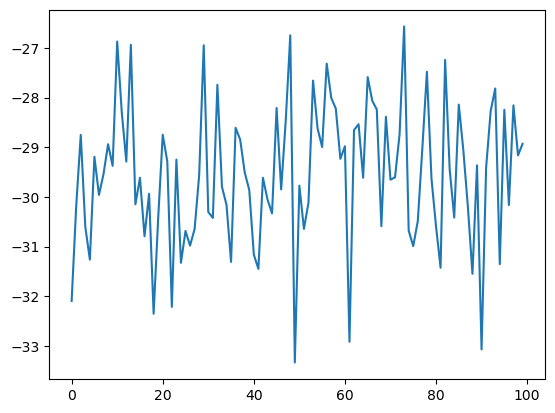

In [177]:
plt.plot(np.arange(num_steps), np.array(store['inhibitory_async']), label='Excitatory')

### Maybe I have to convert the states either into 0 and 1 or patterns into 1 and -1

In [178]:
def retrieve_patterns(ham_dist, M, N):
    """
    Retrieve the stored patterns.
    """
    M_max = 0
    for i in range(M):
        if ham_dist[-1,i] < 0.05:
            M_max += 1
    return M_max / N

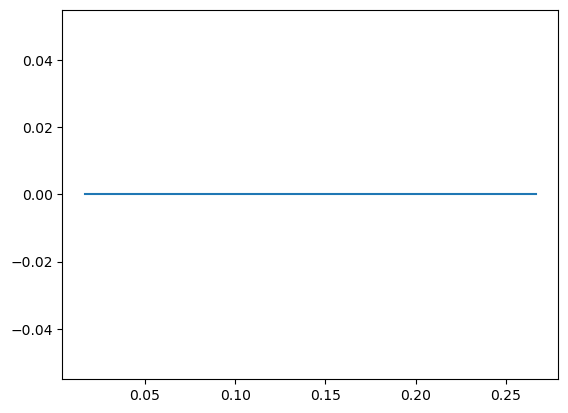

In [179]:
M = np.linspace(5,80,16)
retrieved_patterns = np.zeros(len(M))

for i,m in enumerate(M):
    store, hamm_dist = simulate_network(N, N_I, int(m), K, a, theta, num_steps, update_type='asynchronous')
    hd = np.stack(hamm_dist)
    retrieved_patterns[i] = retrieve_patterns(hd, int(m), N)

plt.figure()
plt.plot(M/N, retrieved_patterns, label='Inhibitory') 

[0.47166667 0.44333333 0.455      0.44333333 0.465      0.46
 0.455      0.47166667 0.46166667 0.46333333]


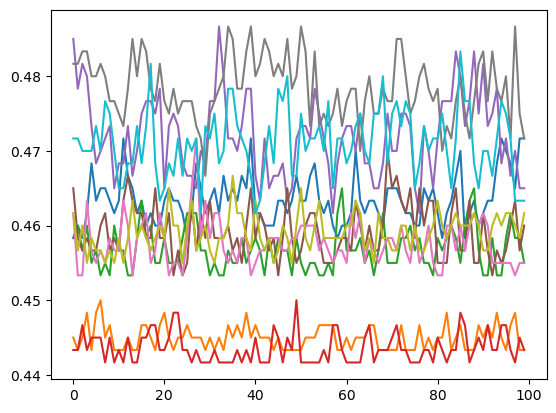

In [180]:
plt.figure()
store, hamm_dist = simulate_network(N, N_I, 10, K, a, theta, num_steps, update_type='asynchronous')
plt.plot(np.arange(num_steps), hamm_dist, label='Excitatory')
print(hamm_dist[-1])